# Floating point vs Finite Differences

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

Define a function and its derivative:

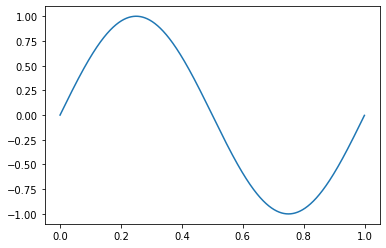

In [2]:
c = 1*2*np.pi

def f(x):
    return np.sin(c*x)

def df(x):
    return c*np.cos(c*x)

n = 2000
x = np.linspace(0, 1, n, endpoint=False).astype(np.float32)

pt.plot(x, f(x))

Now compute the relative $l^\infty$ norm of the error in the finite differences, for a bunch of mesh sizes:

0.03125 0.6148719
0.015625 0.30817786
0.0078125 0.15418236
0.00390625 0.07710259
0.001953125 0.038560793
0.0009765625 0.019304201
0.00048828125 0.009726644
0.000244140625 0.0052371025
0.0001220703125 0.003545761
6.103515625e-05 0.0065107346
3.0517578125e-05 0.014073372
1.52587890625e-05 0.02979517
7.62939453125e-06 0.035783768
3.814697265625e-06 0.09596014
1.9073486328125e-06 0.22322178
9.5367431640625e-07 0.3038249
4.76837158203125e-07 0.75196695
2.384185791015625e-07 1.758626
1.1920928955078125e-07 2.4413676


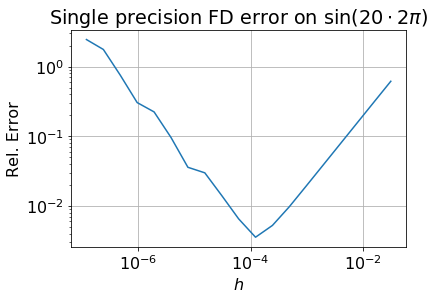

In [6]:
h_values = []
err_values = []

for n_exp in range(5, 24):
    n = 2**n_exp
    h = (1/n)

    x = np.linspace(0, 1, n, endpoint=False).astype(np.float32)

    fx = f(x)
    dfx = df(x)

    dfx_num = (np.roll(fx, -1) - fx) / h

    err = np.max(np.abs((dfx - dfx_num))) / np.max(np.abs(fx))

    print(h, err)

    h_values.append(h)
    err_values.append(err)

pt.rc("font", size=16)
pt.title(r"Single precision FD error on $\sin(20\cdot 2\pi)$")
pt.xlabel(r"$h$")
pt.ylabel(r"Rel. Error")
pt.loglog(h_values, err_values)
pt.grid()

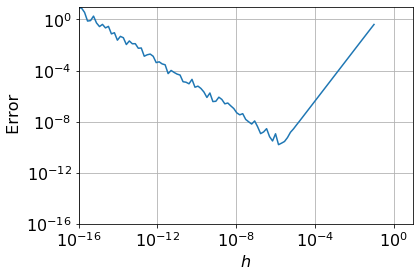

In [10]:
h_values = []
err_values = []

x = 1.0
for n in np.logspace(1,16, 100):
    h = (1/n)

    dfx = df(x)
    
    dfh = (f(x+h) - f(x)) / h
    
    err = np.abs(dfh - dfx) + 2 * 1e-16 / h
    #err = 0.5 * h + 2 * 1e-16 / h
    #print(h, err)

    h_values.append(h)
    err_values.append(err)

pt.rc("font", size=16)
pt.xlabel(r"$h$")
pt.ylabel(r" Error")
pt.loglog(h_values, err_values)
pt.axis([1e-16, 1e1, 1e-16, 1e1])
pt.grid()